In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
#results = pd.read_csv('results.csv')
#t5large = results[results['model'] == 't5-large']
#t5small = results[results['model'] == 't5-small']
#length = t5large[t5large['task'] == 'sentence length']
#disc = t5large[t5large['task'] == 'discourse']
#depth = t5large[t5large['task'] == 'tree depth']
#number = t5large[t5large['task'] == 'subject number']
pdtb = pd.read_csv('scores_PDTB.csv', header=None)
pdtb.columns=['ind', 'epoche', 'layer', 'accuracy', 'precision', 'recall', 'f1-score']
const = pd.read_csv('scores_top_const.csv', header=None)
const.columns=['ind','epoche', 'layer', 'accuracy', 'precision', 'recall', 'f1-score']
conn = pd.read_csv('scores_conn.csv', header=None)
conn.columns=['ind','epoche', 'layer', 'accuracy', 'precision', 'recall', 'f1-score']
depth = pd.read_csv('scores_tree_depth.csv', header=None)
depth.columns=['ind','epoche', 'layer', 'accuracy', 'precision', 'recall', 'f1-score']
person = pd.read_csv('scores_person.csv', header=None)
person.columns=['ind','epoche', 'layer', 'accuracy', 'precision', 'recall', 'f1-score']
dc = pd.read_csv('new_scores_DC.csv')

In [39]:
layer = pdtb.iloc[:7]['layer'].values

In [40]:
#fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(60, 30), sharey=True)
#epoches = 1100000
#x = 0
#j = 0
#for i in range(0, epoches, 100000):
#    layers = ax[x, j].plot(layer, t5small[t5small['epoche']==i]['accuracy'], label='t5small', marker='o')
#    layers = ax[x, j].plot(layer, number[number['epoche']==i]['accuracy'], label='t5large', marker='^')
#    layers = ax[x, j].set_xlabel('layers')
#    layers = ax[x, j].set_ylabel('score')
#    layers = ax[x, j].set_title(f'Scores over layers on the {i}th epoch', size=20)
#    if j != 3:
#        j += 1
#    else:
#        j = 0
#        x += 1
#
#handles, labels = ax[0, 0].get_legend_handles_labels()
#fig.suptitle(f'Comparison of T5-large and T5-small', size=40)
#fig.legend(handles, labels, loc='lower center', prop={'size':40})
#plt.show()

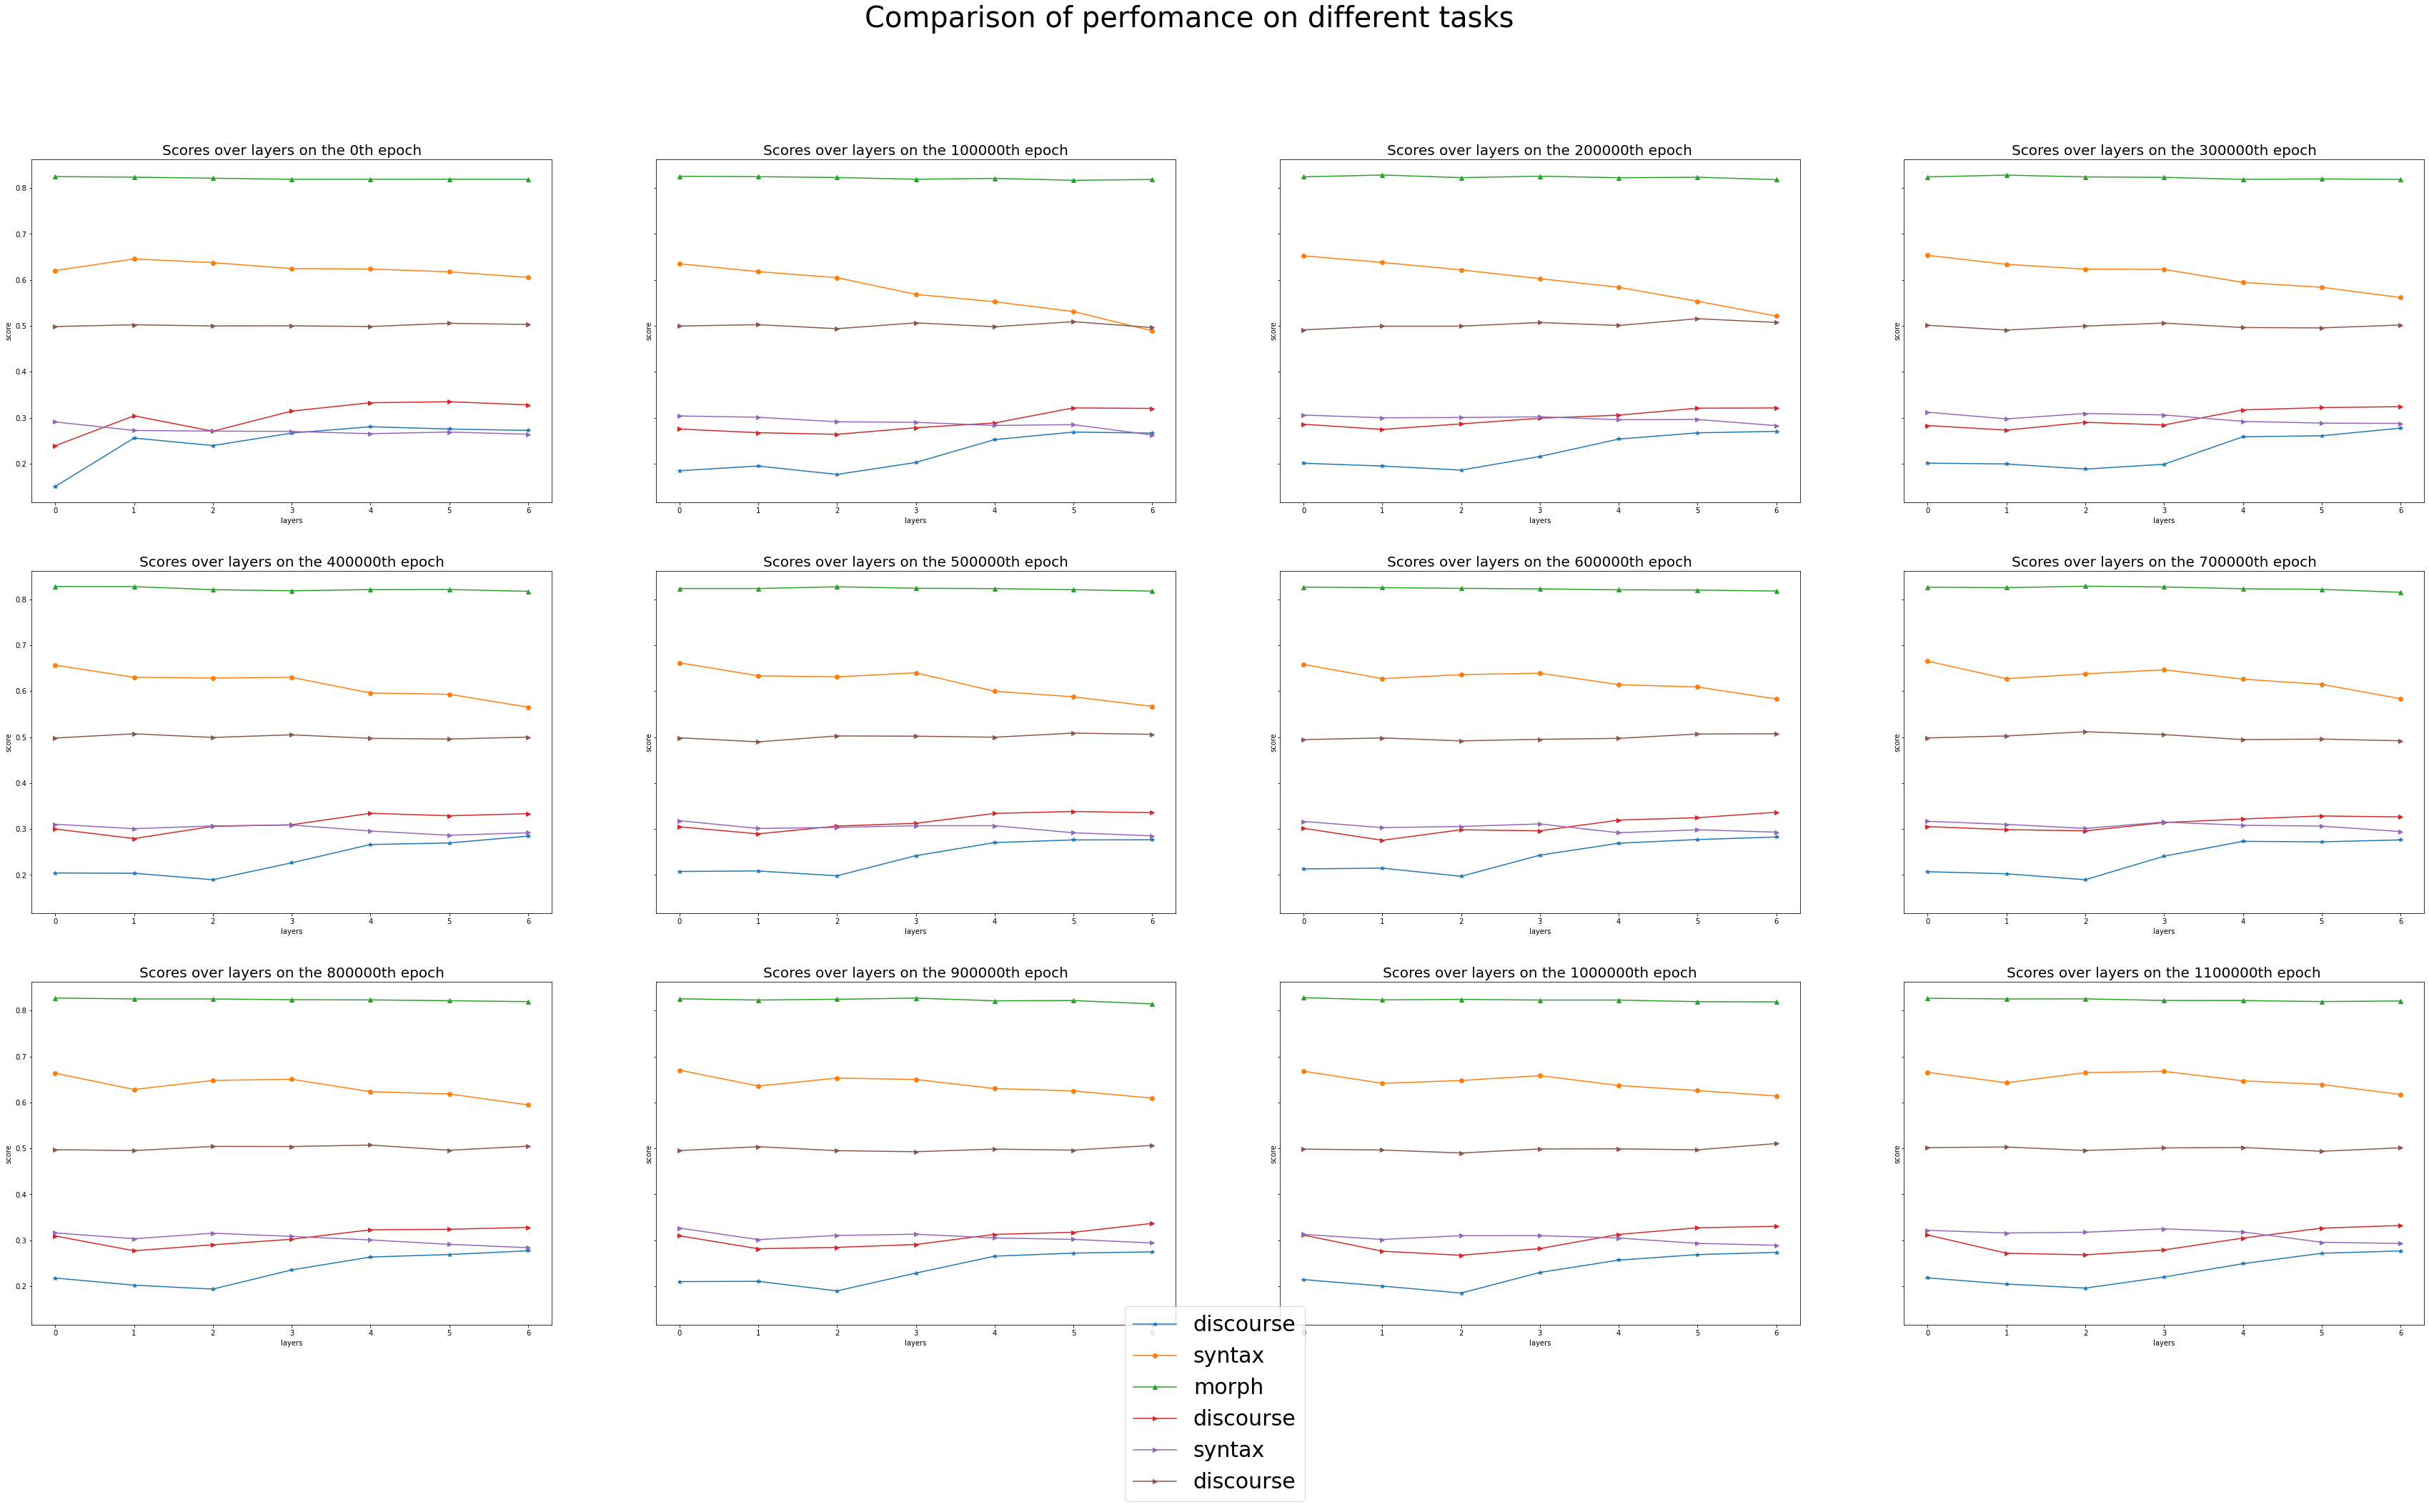

In [44]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(60, 30), sharey=True)

epoches = 1200000
x = 0
j = 0
for i in range(0, epoches, 100000):
    layers = ax[x, j].plot(layer, pdtb[pdtb['epoche']==i]['accuracy'], label='discourse', marker='*')
    layers = ax[x, j].plot(layer, const[const['epoche']==i]['accuracy'], label='syntax', marker='o')
    layers = ax[x, j].plot(layer, person[person['epoche']==i]['accuracy'], label='morph', marker='^')
    layers = ax[x, j].plot(layer, conn[conn['epoche']==i]['accuracy'], label='discourse', marker='>')
    layers = ax[x, j].plot(layer, depth[depth['epoche']==i]['accuracy'], label='syntax', marker='>')
    layers = ax[x, j].plot(layer, dc[dc['epoche']==i]['accuracy'], label='discourse', marker='>')
    layers = ax[x, j].set_xlabel('layers')
    layers = ax[x, j].set_ylabel('score')
    layers = ax[x, j].set_title(f'Scores over layers on the {i}th epoch', size=20)
    if j != 3:
        j += 1
    else:
        j = 0
        x += 1
        
handles, labels = ax[0, 0].get_legend_handles_labels()
fig.suptitle(f'Comparison of perfomance on different tasks', size=40)
fig.legend(handles, labels, loc='lower center', prop={'size':30})
plt.show()

In [33]:
def plot_accuracy(df, task):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey=True)

    x = 0
    j = 0
    epoches = set(df['epoche'])
    layer = df.iloc[:7]['layer']
    colours = [[1, 0, 0], [0.2, 1, 0], [0, 0.5, 1], [0.7, 0.5, 0]]
    for i in range(0, len(epoches), 3):
        r, b, g = colours[i//3]
        i = i * 100000
        layers = ax[x, j].plot(layer, df[df['epoche'] == i]['accuracy'], color=(r, b, g, 0.3), label=i)
        layers = ax[x, j].plot(layer, df[df['epoche'] == i+100000]['accuracy'],color=(r, b, g, 0.5), label=i+100000)
        layers = ax[x, j].set_xlabel('layers')
        layers = ax[x, j].set_ylabel('score')
        layers = ax[x, j].set_title(f'Scores over layers on the {i}, {i+100000}, and {i+200000}th epoches')
        if j != 1:
            j += 1
        else:
            j = 0
            x += 1
    fig.suptitle(f'Accuracy on {task}', size=20)
    fig.legend()
    plt.show()

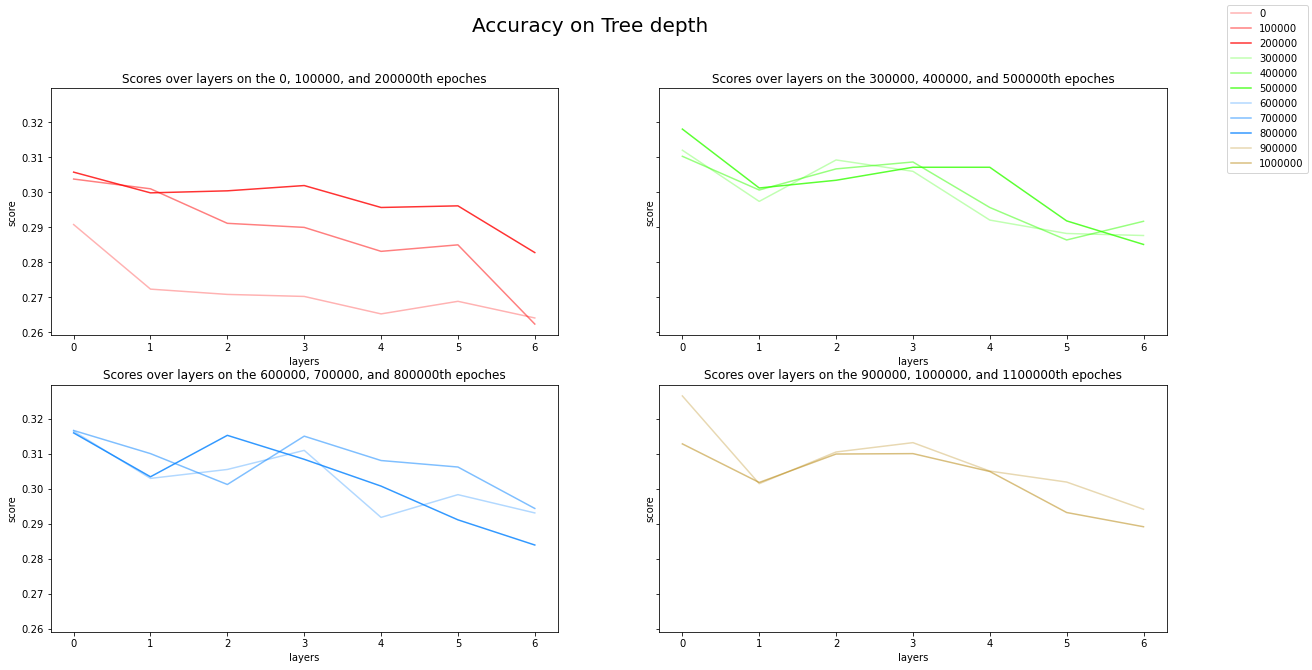

In [34]:
plot_accuracy(depth, 'Tree depth')

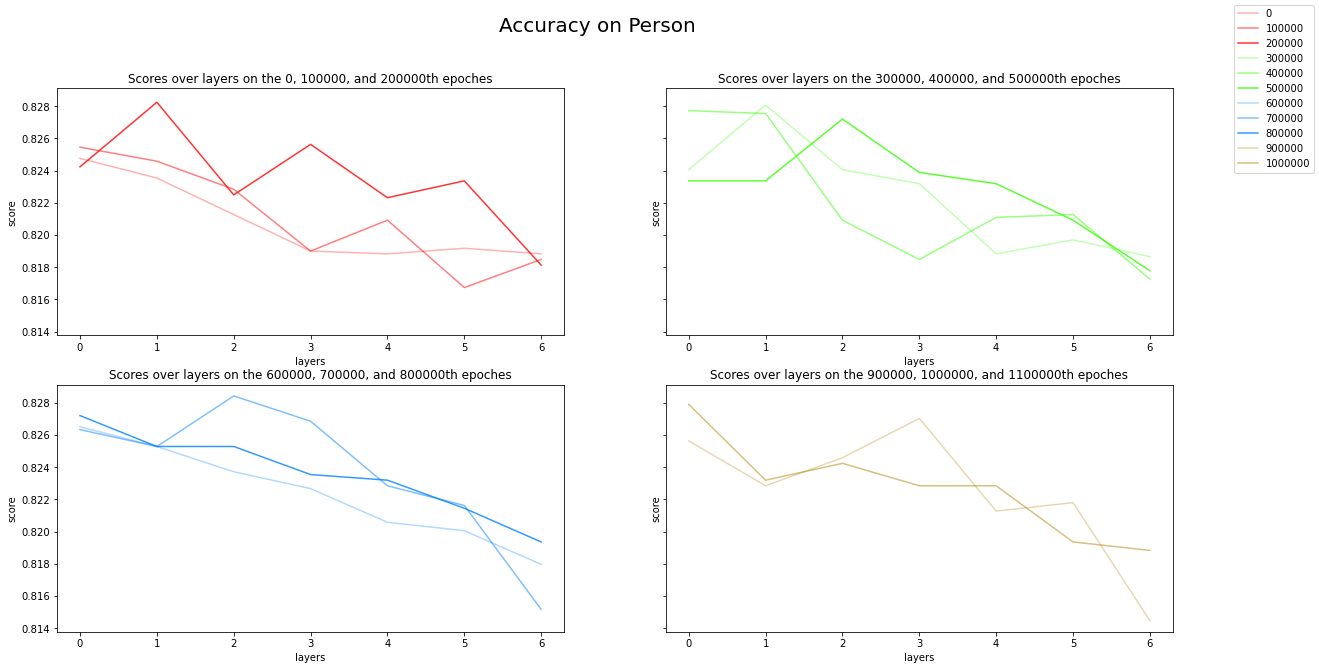

In [35]:
plot_accuracy(person, 'Person')

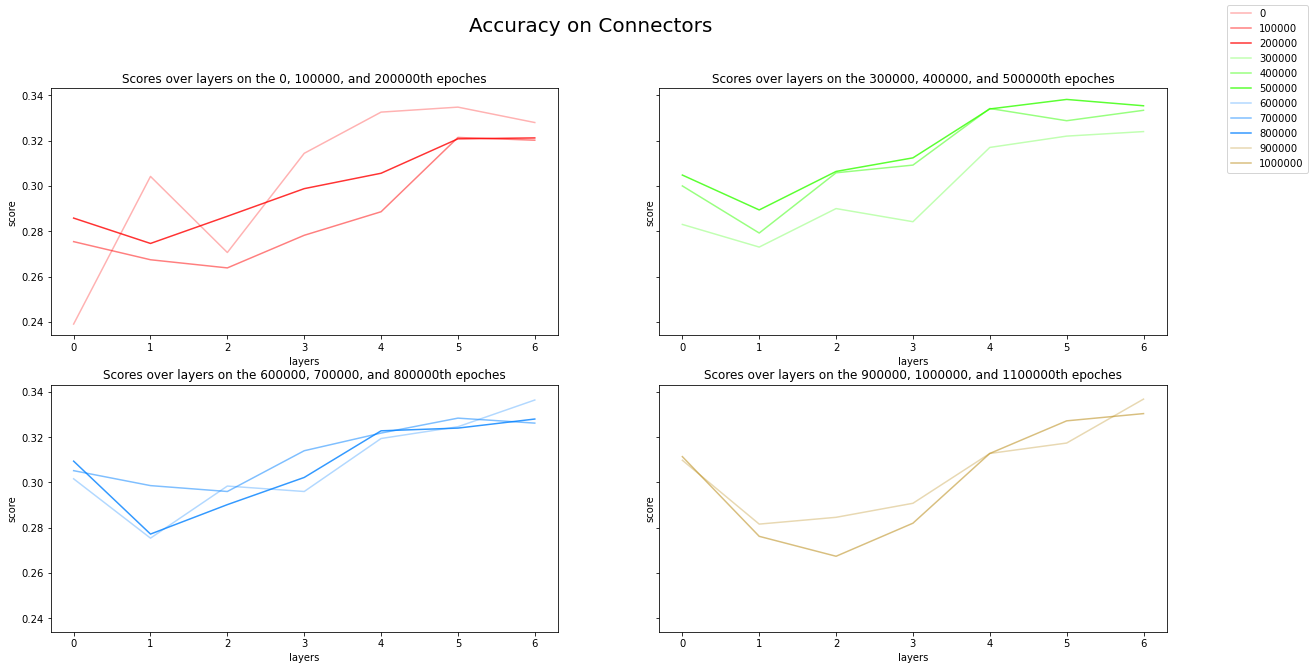

In [36]:
plot_accuracy(conn, 'Connectors')

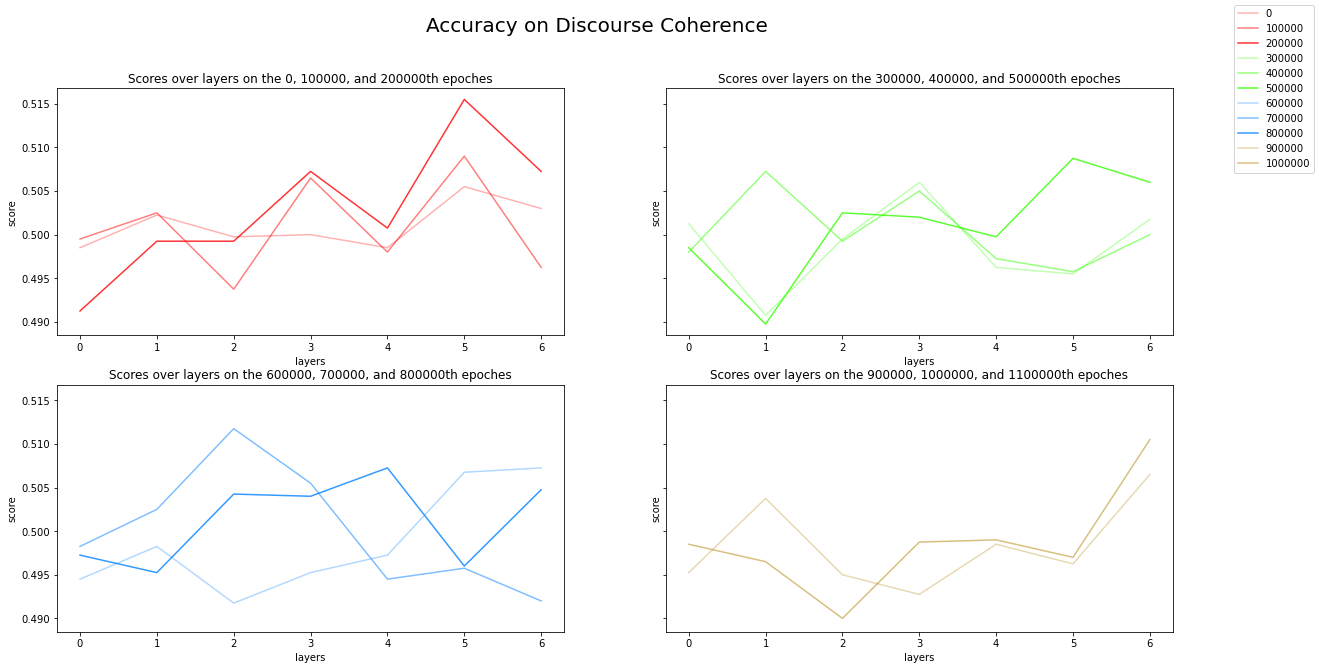

In [42]:
plot_accuracy(dc, 'Discourse Coherence')

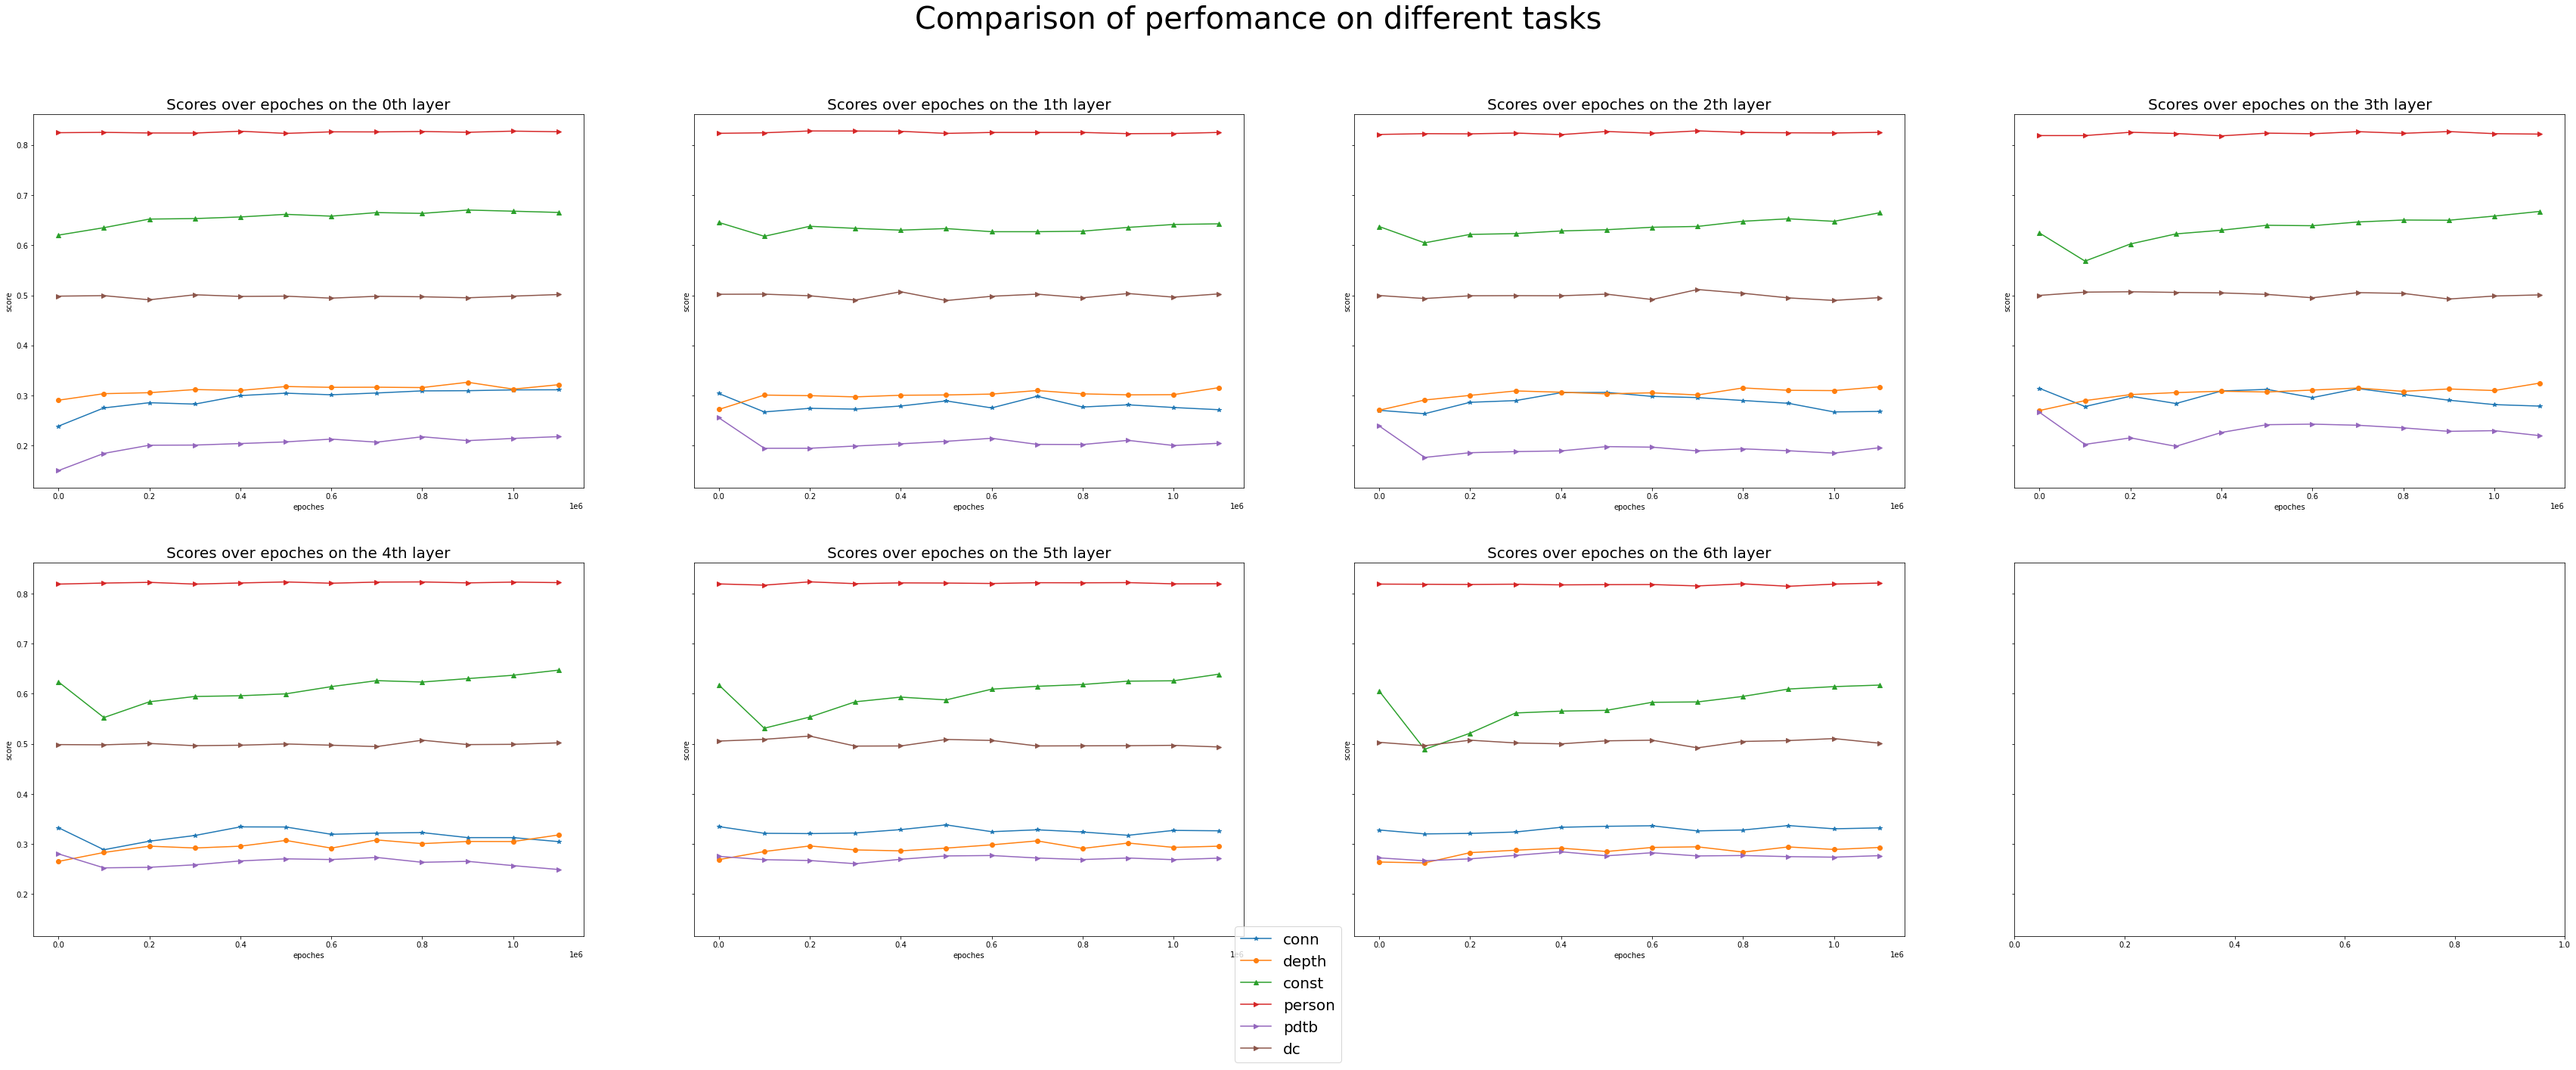

In [43]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(60, 20), sharey=True)

l = 7
epoches = list(range(0, 1200000, 100000))
x = 0
j = 0
for i in range(l):
    layers = ax[x, j].plot(epoches, conn[conn['layer']==i].sort_values('epoche')['accuracy'], label='conn', marker='*')
    layers = ax[x, j].plot(epoches, depth[depth['layer']==i].sort_values('epoche')['accuracy'], label='depth', marker='o')
    layers = ax[x, j].plot(epoches, const[const['layer']==i].sort_values('epoche')['accuracy'], label='const', marker='^')
    layers = ax[x, j].plot(epoches, person[person['layer']==i].sort_values('epoche')['accuracy'], label='person', marker='>')
    layers = ax[x, j].plot(epoches, pdtb[pdtb['layer']==i].sort_values('epoche')['accuracy'], label='pdtb', marker='>')
    layers = ax[x, j].plot(epoches, dc[dc['layer']==i].sort_values('epoche')['accuracy'], label='dc', marker='>')
    layers = ax[x, j].set_xlabel('epoches')
    layers = ax[x, j].set_ylabel('score')
    layers = ax[x, j].set_title(f'Scores over epoches on the {i}th layer', size=20)
    if j != 3:
        j += 1
    else:
        j = 0
        x += 1
        
handles, labels = ax[0, 0].get_legend_handles_labels()
fig.suptitle(f'Comparison of perfomance on different tasks', size=40)
fig.legend(handles, labels, loc='lower center', prop={'size':20})
plt.show()